In [1]:
import utilities
import numpy as np
import pandas as pd
from itertools import combinations, combinations_with_replacement
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns

/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def disimilarity_new(X, group_1, group_2):
    group_1 = np.array(group_1)
    group_2 = np.array(group_2)
    dist = pairwise_distances(X[group_1,:], X[group_2,:])
    total = np.sum(dist)
    return total / (group_1.sum() * group_2.sum())
    
    
    

In [35]:
X = np.array([[1.0,1,1],[2,2,2],[3,3,3]])
disimilarity_new(X, [True, False, True], [False, True, False])

1.7320508075688772

In [8]:
 utilities.average_linkage(np.array([[1,1,1], [3,3,3]]), np.array([[2,2,2]]))

1.7320508075688772

In [3]:
def compare_cell_clusters(data_folder, counts, meta, meta_col):
    # read in dataset
    data_path = data_folder + counts
    X = pd.read_csv(data_path, index_col=0)
    X, keep_cells,_,_ = utilities.preprocess(np.array(X), scale=False)
    meta_path = data_folder + meta
    metadata = pd.read_csv(meta_path, index_col=0)
    if type(meta_col)==int:
        real_y, key = pd.factorize(metadata.iloc[:,meta_col], sort=True)
    else: real_y, key = pd.factorize(metadata[meta_col], sort=True)
    real_y = real_y[keep_cells]
    
    print(len(real_y))
    print(X.shape)
    types = len(np.unique(real_y))
    ret = np.zeros(shape=(types, types))
    for combo in combinations_with_replacement(np.unique(real_y),2):
        #disimilarity = utilities.average_linkage(X[real_y == combo[0]], X[real_y == combo[1]])
        disimilarity = disimilarity_new(X, real_y == combo[0], real_y == combo[1])
        ret[combo[0], combo[1]] = disimilarity
        print(str(key[combo[0]]) + " and " + str(key[combo[1]]) + " = " + str(disimilarity))
        
    upper = np.triu(ret)
    ret = upper + upper.T - np.diag(upper.diagonal())
    
    print(key)
    return ret

In [11]:
mat = compare_cell_clusters("/home/groups/ConradLab/daniel/sharp_data/jung/", 'counts.csv', 'labels.csv', 0)
mat

692
(692, 500)
spc and spc = 73.74024959688256
spc and spd = 73.88624422026061
spc and spg = 81.2252694812486
spd and spd = 70.04655140532545
spd and spg = 82.85252019669828
spg and spg = 67.53529039219366
Index(['spc', 'spd', 'spg'], dtype='object')


array([[73.7402496 , 73.88624422, 81.22526948],
       [ 0.        , 70.04655141, 82.8525202 ],
       [ 0.        ,  0.        , 67.53529039]])

692
(692, 500)
spc and spc = 73.74024119860253
spc and spd = 73.88623765237494
spc and spg = 81.2252694812486
spd and spd = 70.04655140532545
spd and spg = 82.85252019669828
spg and spg = 67.53527866391443
Index(['spc', 'spd', 'spg'], dtype='object')
[[73.7402412  73.88623765 81.22526948]
 [73.88623765 70.04655141 82.8525202 ]
 [81.22526948 82.8525202  67.53527866]]


<AxesSubplot:>

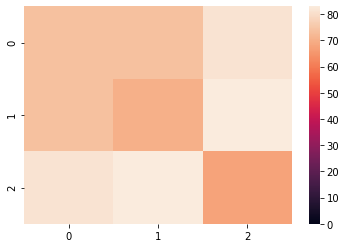

In [5]:
mat = compare_cell_clusters("/home/groups/ConradLab/daniel/sharp_data/jung/", 'counts.csv', 'labels.csv', 0)
print(mat)
sns.heatmap(mat, vmin=0, vmax=83)

In [33]:
X, real_y = compare_cell_clusters("/home/groups/ConradLab/daniel/sharp_data/jung/", 'counts.csv', 'labels.csv', 0)

spc and spd = 73.88623989455186
spc and spg = 81.22526369768396
spd and spg = 82.85252243550484
Index(['spc', 'spd', 'spg'], dtype='object')


998
(998, 500)
Group1 and Group1 = 42.00748263996528
Group1 and Group2 = 43.03839389441074
Group1 and Group3 = 42.87681025165972
Group1 and Group4 = 41.65165515024908
Group2 and Group2 = 42.74762328675087
Group2 and Group3 = 43.13968981035037
Group2 and Group4 = 41.9081799933088
Group3 and Group3 = 42.21119569396386
Group3 and Group4 = 41.698843537414966
Group4 and Group4 = 39.705597667638486
Index(['Group1', 'Group2', 'Group3', 'Group4'], dtype='object')
[[42.00748264 43.03839389 42.87681025 41.65165515]
 [43.03839389 42.74762329 43.13968981 41.90817999]
 [42.87681025 43.13968981 42.21119569 41.69884354]
 [41.65165515 41.90817999 41.69884354 39.70559767]]


<AxesSubplot:>

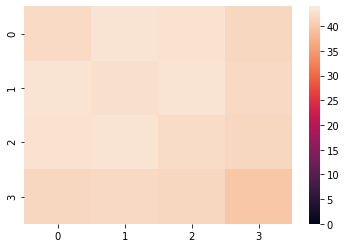

In [6]:
mat = compare_cell_clusters("/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.7_de_rq/", 'query_counts.csv', 'query_meta.csv', "Group")
print(mat)
sns.heatmap(mat, vmin=0, vmax=44)

In [32]:
X, real_y = compare_cell_clusters("/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.7_de_rq/", 'query_counts.csv', 'query_meta.csv', "Group")

Group1 and Group2 = 43.03840230729052
Group1 and Group3 = 42.87681787266156
Group1 and Group4 = 41.65165749806866
Group2 and Group3 = 43.13969845362546
Group2 and Group4 = 41.908186184949166
Group3 and Group4 = 41.69884955141725
Index(['Group1', 'Group2', 'Group3', 'Group4'], dtype='object')


998
(998, 500)
Group1 and Group1 = 42.12329499658999
Group1 and Group2 = 43.433490383374206
Group1 and Group3 = 43.08833564922032
Group1 and Group4 = 41.6639241523381
Group2 and Group2 = 43.210616265788765
Group2 and Group3 = 43.46094905175185
Group2 and Group4 = 42.05804198728672
Group3 and Group3 = 42.13851595540177
Group3 and Group4 = 41.59050420168067
Group4 and Group4 = 39.19979175343607
Index(['Group1', 'Group2', 'Group3', 'Group4'], dtype='object')
[[42.123295   43.43349038 43.08833565 41.66392415]
 [43.43349038 43.21061627 43.46094905 42.05804199]
 [43.08833565 43.46094905 42.13851596 41.5905042 ]
 [41.66392415 42.05804199 41.5905042  39.19979175]]


<AxesSubplot:>

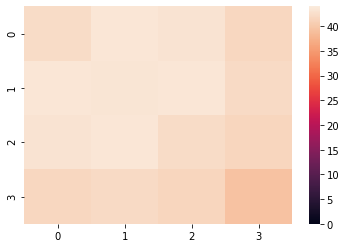

In [7]:
mat = compare_cell_clusters("/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.8_de_rq/", 'query_counts.csv', 'query_meta.csv', "Group")
print(mat)
sns.heatmap(mat, vmin=0, vmax=44)

In [34]:
X, real_y = compare_cell_clusters("/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.8_de_rq/", 'query_counts.csv', 'query_meta.csv', "Group")

Group1 and Group2 = 43.433500149580254
Group1 and Group3 = 43.08833691801796
Group1 and Group4 = 41.663929044566274
Group2 and Group3 = 43.46095330551942
Group2 and Group4 = 42.058046933917865
Group3 and Group4 = 41.59050578730638
Index(['Group1', 'Group2', 'Group3', 'Group4'], dtype='object')


In [35]:
X, real_y = compare_cell_clusters("/home/groups/ConradLab/daniel/sharp_data/sharp_sims_test/splat_0.8_de_rq/", 'query_counts.csv', 'query_meta.csv', "Group")

Group1 and Group2 = 43.43349771633815
Group1 and Group3 = 43.088334649695426
Group1 and Group4 = 41.66392728654438
Group2 and Group3 = 43.46095138971003
Group2 and Group4 = 42.058045347130154
Group3 and Group4 = 41.59050424668158
Index(['Group1', 'Group2', 'Group3', 'Group4'], dtype='object')


In [37]:
X, real_y = compare_cell_clusters("/home/groups/ConradLab/daniel/sharp_data/sharp_sims_de_testing/splat_0.3_de_rq_103122/", 'query_counts.csv', 'query_meta.csv', "Group")

Group1 and Group2 = 44.82626442378252
Group1 and Group3 = 44.83444169183506
Group1 and Group4 = 44.75475300480137
Group2 and Group3 = 44.92729778925871
Group2 and Group4 = 44.828342446496436
Group3 and Group4 = 44.8283992729658
Index(['Group1', 'Group2', 'Group3', 'Group4'], dtype='object')


In [38]:
X, real_y = compare_cell_clusters("/home/groups/ConradLab/daniel/sharp_data/sharp_sims_de_testing/splat_0.9_de_rq_103122/", 'query_counts.csv', 'query_meta.csv', "Group")

Group1 and Group2 = 45.861992683203624
Group1 and Group3 = 45.79678448501366
Group1 and Group4 = 45.45277033793568
Group2 and Group3 = 46.091879768126375
Group2 and Group4 = 45.659266812069994
Group3 and Group4 = 45.61782638776969
Index(['Group1', 'Group2', 'Group3', 'Group4'], dtype='object')


In [17]:
for combo in combinations([0,1,2], 2):
    print(combo)

(0, 1)
(0, 2)
(1, 2)


In [11]:
real_y

array([2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1,
       2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0,
       0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0,
       1, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 2, 2,
       0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0,
       0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2,
       1, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 2, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 1, 1, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0,
       0, 0, 1, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0, 1, 1, 2, 0,
       2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 2,

In [13]:
X[real_y==0]

array([[-14.185537  ,  -7.458223  ,   8.384081  , ...,  -0.1183617 ,
         -0.58229095,   1.5128574 ],
       [-15.797154  , -13.1198225 ,   5.4865193 , ...,   1.193898  ,
          1.3348278 ,   0.98085797],
       [ -1.5621954 , -10.570117  ,  -4.47332   , ...,   1.0716755 ,
         -1.2324159 ,  -0.64864415],
       ...,
       [-11.904461  , -11.370434  ,   6.843371  , ...,  -0.32835588,
          2.4064457 ,  -0.36809808],
       [-13.625015  , -10.563273  ,   5.9214606 , ...,  -1.1095074 ,
          0.36168855,   0.94928414],
       [-14.012843  , -12.057545  ,   4.094969  , ...,  -1.2905434 ,
         -0.7926164 ,  -0.35491347]], dtype=float32)

<AxesSubplot:>

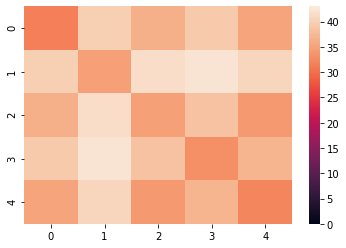

In [8]:
#pbmc grid
mat = [[31.45326258, 39.66530823, 36.41303546, 39.16775237, 35.15459829],
 [39.66530823, 34.6659908,  41.36156587, 42.04896043, 40.639878],
 [36.41303546, 41.36156587, 34.67618332, 38.36158832, 34.04338626],
 [39.16775237, 42.04896043, 38.36158832, 33.07130903, 36.92302339],
 [35.15459829, 40.639878,   34.04338626, 36.92302339, 32.22839927]]

#plt.matshow(mat)
sns.heatmap(mat, vmin=0, vmax=43)